# Project: Investigate a Dataset (Income per person (GDP/capita, PPP $ inflation-adjusted))


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have chosen to work with the dataset, *Income per person based on gross domestic product (GDP)*, which has been adjusted for purchasing power in international dollars. I chose to work with this dataset to analyze the standard of living in the United States in comparison to 3 other countries, track the trend of the adjusted *PPP dollars* over a period of time to observe any differences in the cost of living between the 3 countries. I will observe tracking the trends of growth in the U.S. over a particular time span, compare the United States growth to 3 other countries, and determine whether or not if the the rank of the U.S. falls higher or lower in the cost of living compared to the 3 other countries. 

> # 1. Import Packages #

In [3]:
# Import libraries.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib  inline


> ## 1.a Load data into dataframe

In [4]:
# Dataset is now loaded into data frame and indexed by column, 'country'

df = pd.read_csv(r'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',sep=',',index_col='country')

df.head()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,724,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In my results of loading the dataset, I returned the first 5 rows from the loaded *income_per_person_gdppercapita_ppp_inflation_adjusted.csv* file into a pandas dataframe which was saved into a variable named *df*. While loading in the raw file into the pandas dataframe, I passed in the argument of *sep=','* because I noticed the file was comma delimited. I also passed in another argument, *index_column='country'* because I intended use the field *country* as the dataframe index.

<a id='wrangling'></a>

 # 2.Data Wrangling #

In [6]:
# After loading dataset, to create a dataframe,I print out the summary of the data frame.


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Columns: 241 entries, 1800 to 2040
dtypes: int64(241)
memory usage: 364.9+ KB
None


The reason I chose to print the dataframe information was to give insight into key attributes about the data, including:
- Data type
- Field/Row Count (shape of dataframe)
- Row range (Afghanistan to Zimbabwe)
- Field range (1800 to 2040)

    

>## 2.a  Feature Selection ##

>**After rendering dataframe, listed below are the dependent and independent variables I have chosen to analyze;**

>#### Dependent variable
- United States 

>#### Independent variables:
- United Arab Emirates
- Nigeria
- United Kingdom


In [14]:
df_selected_features.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
United States,1980,2020,2050,2020,2010,2060,2090,2110,1970,2060,...,66800,68100,69500,70900,72300,73800,75300,76800,78400,80000
United Arab Emirates,998,1000,1010,1010,1010,1020,1020,1020,1030,1030,...,66800,68100,69400,70800,72200,73700,75200,76700,78300,79900
Nigeria,851,853,854,856,857,859,860,862,864,865,...,5720,5830,5940,6060,6180,6310,6440,6570,6700,6840
United Kingdom,3280,3290,3300,3190,3140,3280,3220,3390,3190,3240,...,47200,48100,49100,50100,51100,52200,53200,54300,55400,56500


In [7]:
# I've returned the column at level(0)
df.columns = df.columns.get_level_values(0)

After I loaded in the dataframe, I noticed the column had 2 levels (multi-index) so I proceeded in selecting the first level that contained the first index.

In [31]:
df_selected_features=  df.loc[['United States','United Arab Emirates','Nigeria','United Kingdom']]

I created a new dataframe "df_selected_features" from my exisitng dataframe, and used the *.loc* method to filter out the 4 countries I want to do analysis on.

In [32]:
# Check for empty values of null
total_null = 0
print('check for null')
for i in df_selected_features.isnull().sum():
    if i != 0:
        total_null += 1
print('total null Values:',total_null)
        
print('\n')
total_isnan = 0
print('check for isnan')
for i in df_selected_features.isna().sum():
    if i != 0:
        total_isnan += 1
print('total isnan values:',total_isnan)

check for null
total null Values: 0


check for isnan
total isnan values: 0


I got a sum of each row that contained a value of *NULL* or *NAN* and decided to check the total count of *NULL* and *NAN* for the entire dataframe.

In [37]:
# Check for any duplicate field or rows

df_selected_features.columns.duplicated(keep='first')
df_selected_features.index.duplicated(keep='first')

#df_selected_features.head()

array([False, False, False, False], dtype=bool)

I checked for duplicate columns and rows then selected the first field and dropped the duplicate.

> ## 2.b Transpose Data Frame

> Now that I've selected my variables at level(0) based on country, I now want to do some further maipulation, and also transpose this dataset, by flipping country and year. In order to execute this action, I'll have to reset the index so that I can select the index myself.



In [38]:
df_new = df_selected_features.transpose().reset_index()

In [39]:
# rename field to represent correct description
df_new.rename(mapper={'index':'Year'},inplace=True,axis=1)

In [40]:
df_new.head()

country,Year,United States,United Arab Emirates,Nigeria,United Kingdom
0,1800,1980,998,851,3280
1,1801,2020,1000,853,3290
2,1802,2050,1010,854,3300
3,1803,2020,1010,856,3190
4,1804,2010,1010,857,3140


In order for me to work with this data I had to move the years to the rows(index) and the country name to a column. I then renamed the index.name to years and this was saved into a new dataframe.

 <a id='clean'></a>
 
 # 3. Load clean data #

In [41]:
# saved cleaned dataset to file for future reference
df_new.to_csv('cleaned_country_dataset.csv',header=True, index=False)

In [42]:
# Read cleaned file into a variable
df_country = pd.read_csv('cleaned_country_dataset.csv',index_col='Year')

In [43]:
df_country.head()

,United States,United Arab Emirates,Nigeria,United Kingdom
Year,,,,
1800,1980,998,851,3280
1801,2020,1000,853,3290
1802,2050,1010,854,3300
1803,2020,1010,856,3190
1804,2010,1010,857,3140


<a id='eda'></a>
## 4. Exploration Phase

> For this part of the section, I will take what I've researched and ask the right questions that will drive towards comparing the cost of living with the United states to it's indpendent vatriables; U.A.E, Nigeria, and the United Kingdom. I will show representation of by visualizing relationships on a plotted chart. 



In [44]:
# Gather stats about the data
df_country.describe()

,United States,United Arab Emirates,Nigeria,United Kingdom
count,241.000000,241.000000,241.000000,241.000000
mean,19022.033195,27927.626556,2239.149378,14975.477178
std,20969.087119,44253.798654,1600.732068,14188.166103
min,1970.000000,998.000000,851.000000,3040.000000
25%,3350.000000,1210.000000,1060.000000,4930.000000
50%,8130.000000,1760.000000,1530.000000,7970.000000
75%,29500.000000,63500.000000,3060.000000,20700.000000
max,80000.000000,179000.000000,6840.000000,56500.000000


**Bi - variate Data**

I used the method *describe* to get meaningful statistics for each variable (dependent and independent):
- count
- mean
- Standard Deviation
- min
- max
- Percentiles

In [51]:
# give the pearson correlation of all variables
df_correlation = df_country.corr()

Text(0.5,1,' Heatmap for income_per_person_gdppercapita_ppp_inflation_adjusted')

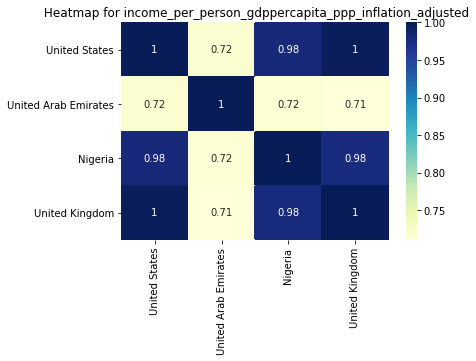

In [55]:
 
ax = sns.heatmap(df_correlation, annot=True,cmap="YlGnBu")
ax.set_title(" Heatmap for income_per_person_gdppercapita_ppp_inflation_adjusted")

This heatmap shows the correlation of the United States against the United Arab Emirates, Nigeria and the United Kingdom.

In [57]:
# I filtered out the range from 1950-2020

x = np.array(df_country.loc[1950:2020].index.astype(int)) 

Text(0.5,0,'Years')

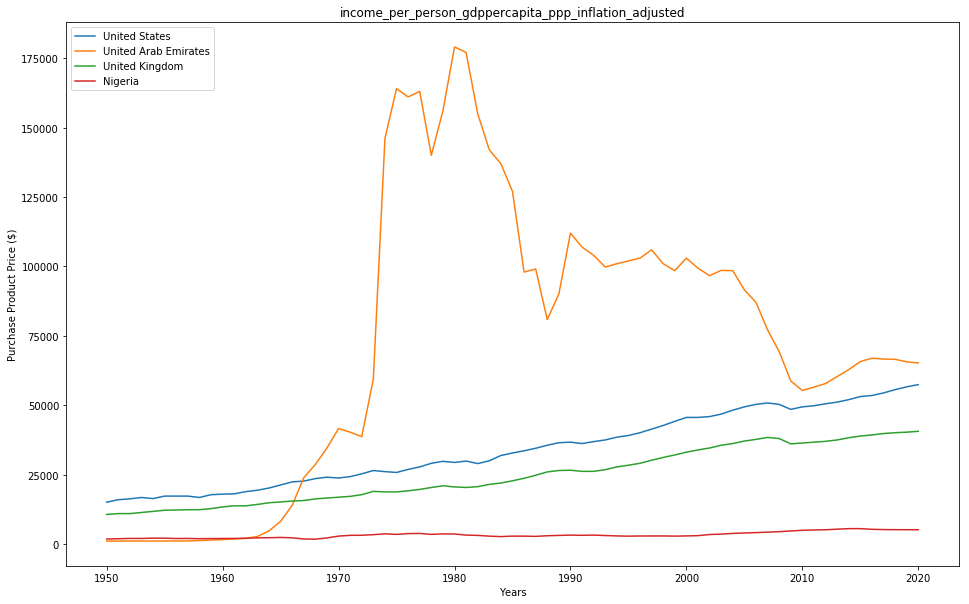

In [63]:
# The line chart is now smooth and focuses on the year range I am interested in vizualizing.
%matplotlib inline
plt.figure(figsize=(16,10))

plt.plot(x, df_country['United States'].loc[1950:2020])
plt.plot(x, df_country['United Arab Emirates'].loc[1950:2020])
plt.plot(x, df_country['United Kingdom'].loc[1950:2020])
plt.plot(x, df_country['Nigeria'].loc[1950:2020])

plt.legend(['United States', 'United Arab Emirates',
            'United Kingdom', 'Nigeria'], loc='upper left')

plt.title('income_per_person_gdppercapita_ppp_inflation_adjusted')
plt.ylabel('Purchase Product Price ($)')
plt.xlabel('Years')

### Research Question 1

What is the United States 5 year(2015-2020) average, 'PPP' compared to United Arab Emirates, Nigeria and United Kingdom. 



In [64]:
df_country.loc[2015:2020].mean()

# The United States comes in second place, in comparison to the 3 other countries?

United States           55200.000000
United Arab Emirates    66183.333333
Nigeria                  5401.666667
United Kingdom          39933.333333
dtype: float64

### Research Question 2 

Which country has a **high** correlation to the United States PPP (Product Purchasing Price)?

In [65]:
print(df_country.corr()[df_country.corr()['United States'] != 1.00]['United States'])
print('\n')
print('Max:',df_country.corr()[df_country.corr()['United States'] != 1.00]['United States'].max())

# I filtered out by 1 on the field - 'United States' to avoid comparing the U.S. to itself.

#The United States has a high correlation to the United Kingdom.

United Arab Emirates    0.720283
Nigeria                 0.980491
United Kingdom          0.998174
Name: United States, dtype: float64


Max: 0.998174322212


### Research Question 3 

Which country has the **lowest** correlation in comparison to the United States PPP (Product Purchasing Price)?

In [66]:
print(df_country.corr()[df_country.corr()['United States'] != 1.00]['United States'])
print('\n')
print('Min:',df_country.corr()[df_country.corr()['United States'] != 1.00]['United States'].min())


# I duplicated the above steps and modified my script to only include the 'Min.'


United Arab Emirates    0.720283
Nigeria                 0.980491
United Kingdom          0.998174
Name: United States, dtype: float64


Min: 0.720283079348


### Research Question 4 

What will be the United States 'PPP' Compounded Annual Growth Rate *(CAGR)* over 20 year (2000-2020) span?

In [67]:
ending_value = df_country['United States'].loc[2020]
print ('ending_value: ',ending_value)

begin_value = df_country['United States'].loc[2000]
print ('begin_value: ',begin_value)

number_of_years = 2020 - 2000
print ('number_of_years: ',number_of_years)

CAGR = ((ending_value/begin_value)**(1/number_of_years))-1
print ('CAGR: ',CAGR*100)

# The United States saw a 1.15 Compunded Annual Growth Rate over a 20 year span from 2000-2020 

ending_value:  57500
begin_value:  45700
number_of_years:  20
CAGR:  1.15505306126


<a id='limitations'></a>
## Limitations


There were a few limitations I faced, including the following:
    
- When plotting I only plotted from a range between 1950 to 2020.
- I smoothed out the data to be more meaningful by selecting a date range between 2000-2020 to plot on the line chart.

<a id='conclusions'></a>
## Conclusions



> I found it most interesting viewing the United Arab Emirates's PPP, solely due to the growth spurt plotted in mychart, so I will discuss my findings with the U.A.E first. Based on my observation, I found that 75%tile of the United Arab Emirates, *PPP* falls within the range of 998.00 to 63500.00. The U.A.E had an exponential growth spurt of *PPP* that surpassed the U.S. starting from the year, *1967*, and between *1979-1982*, the U.A.E saw its maximum *PPP* at 179000.00. Now, let's discuss some correlations I continued to evaluate from the Income per person (GDP/capita, PPP $ inflation-adjusted) Dataset from a range oof, **1950-2020**. I noticed very quickly, The United States plots slightly above the United Kingdom from 1950-2020. However, there is a similar pattern of steady, PPP growth amongst the two .This would explain why the UK has a similar standard of living per person, as the U.S. with The UK coming in with a highest rank of correlation to the U.S. at just 0.99; similar to that of the U.S. at 1.00. In comparison to that of, the United States to the 3 other countries, I can see the United States Average, *PPP* to the U.A.E, Nigeria, and UK, the United States ranks **second** out of the 4 countries, from *2015-2020*. Nigeria comes in last, with an average, *PPP* of 5401.67 from 2015-2020. In contrast, the United Arab Emirates has the **lowest** correlation of PPP to that of the United States with a min-0.72. In conclusion, if I were to make the decision to move to one of the 3 countries, I would live in the United Kingdom as it appears their cost of living is **highest** in coorelation... And I hear the UK has the best biscuit and tea!:) 


# Sources cited #


Income per person (GDP,capita, PPP$ infalation-adjusted) Dataset

sourcename: https://www.gapminder.org/data/documentation/gd001/
https://www.gapminder.org/data/documentation/gd001/


https://www.geeksforgeeks.org/python-pandas-dataframe-info/#:~:text=Pandas%20dataframe.info()%20function,the%20dataframe.info()%20function.


File formatting
https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/


df.iloc to list country names for variables. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html


Transpose data frame by flipping country and year.
https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php#:~:text=The%20transpose()%20function%20is,as%20columns%20and%20vice%2Dversa.

https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

Plotting Lne Chart and Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html

Adding legend to heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

Filtered dataframe to get max value.
https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/


Formual referenced to calculate the CAGR in the U.S.
https://www.investopedia.com/terms/c/cagr.asp

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0